### Interpreting  American Sign Language Using Machine Learning

### Importing the Required Libraries

In [1]:
#Importing the required libraries
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from PIL import Image
from numpy import asarray
import glob
from tqdm import tqdm
import shutil
from pathlib import Path
import random
from keras.utils import np_utils
import matplotlib.pyplot as plt
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

### Printing the current working directory

In [2]:
cwd = os.getcwd()

In [3]:
cwd

'C:\\Users\\skasibhotla\\Downloads'

### Adding the images to the image_arrays and the Corresponding labels to labels

In [4]:
pic_lib = r'C:\\Users\\skasibhotla\\Downloads\\ASL'

letter_list = []

for item in os.listdir(pic_lib):
    letter_list.append(item)

extensions = ("*.jpg", "*.jpeg")

image_arrays = []
labels = []

for letter in letter_list:
    for ext in extensions:
        for index, pic in enumerate(glob.glob(pic_lib + "\\" + letter + "\\" + ext), start = 1):
            
            #file name to label           
            labels.append(letter)
           
            #split file path and file name 
            path, filename = os.path.split(pic)
            
            #New array Name
            newFileName = str(letter)+str(index)
            
            img = cv2.imread(os.path.join(pic_lib, pic), 0)  
            
            new_img_array = cv2.resize(img, dsize=(80, 80))
            image_arrays.append(new_img_array)
            

###  There are total 5408 images in the dataset

In [5]:
len(labels)

5408

Good sources:

https://auth0.com/blog/image-processing-in-python-with-pillow/

https://medium.com/neuronio/how-to-deal-with-image-resizing-in-deep-learning-e5177fad7d89

In [6]:
s = pd.Series(labels)

### Counting the number of images in each alphabet folder 

In [7]:
s.value_counts()

T    240
L    235
K    230
V    229
E    224
D    218
P    216
B    214
J    214
C    214
N    207
G    204
I    203
Y    203
A    203
W    202
R    201
Q    201
X    200
F    199
U    195
O    195
H    194
Z    192
S    189
M    186
dtype: int64

### Reshaping the image to 80 * 80 pixel and grayscale

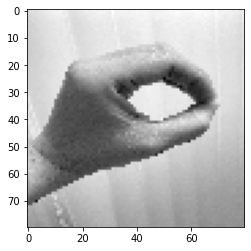

In [8]:
some_pic = image_arrays[3000]
some_pic_image = some_pic.reshape(80,80)
plt.imshow(some_pic_image, cmap='gray')
plt.show()

In [9]:
labels[3000]

'O'

### Convert the Alphabet letters to numbers: (A:1, B:2, C:3, D:4....etc.)

In [10]:
distinct_char = set(labels)
num_distinct_char = len(distinct_char)
#num_distinct_char

In [11]:
num_list = []
for num in range(num_distinct_char):
    num_list.append(num)
#num_list

In [12]:
distinct_char_list = sorted(list(distinct_char))
#distinct_char_list

In [13]:
char_num_dict = dict(zip(distinct_char_list, num_list))

In [14]:
num_labels = []
for key, value in char_num_dict.items():
    for char in labels:
        if char == key:
            num_labels.append(value)

In [15]:
#reshuffle list of arrays in same order
zip_lists = list(zip(image_arrays, num_labels)) 
random.Random(42).shuffle(zip_lists) 
X_list, y_list = zip(*zip_lists) 

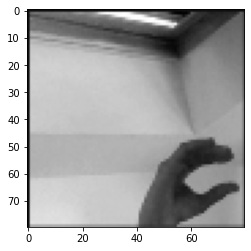

In [16]:
some_pic = X_list[4000]
some_pic_image = some_pic.reshape(80,80)
plt.imshow(some_pic_image, cmap='gray')
plt.show()

In [17]:
y_list[4000]

2

### Convert X_list, y_list into arrays:

In [18]:
X = np.asarray(X_list)
Y = np.asarray(y_list)

### Split the data into 80:20

In [19]:
train_per = 0.80
test_per = 1 - train_per

train_num = int(round(X.shape[0]*train_per))
test_num = int(round(X.shape[0]*test_per))

### Normalizing X values from 1-255 to 0-1 scale

In [20]:

X_train, X_test = X[:train_num] / 255.0, X[train_num:] / 255.0
Y_train_cat, Y_test_cat = Y[:train_num], Y[train_num:]

### Reshaping the data to 80 * 80 pixel with colour channel as 1 for grayscale

In [21]:
X_train = X_train.reshape(X_train.shape[0], 80, 80, 1)
X_test = X_test.reshape(X_test.shape[0], 80, 80, 1)

### One-hot Encode Y-values

In [22]:
n_classes = 26

Y_train = np_utils.to_categorical(Y_train_cat, n_classes)
Y_test = np_utils.to_categorical(Y_test_cat, n_classes)

### Model Building

### Model 1

In [23]:
model1 = Sequential()

model1.add(Conv2D(64, (3, 3), input_shape=(80,80,1)))
model1.add(Activation('relu'))

model1.add(Conv2D(64, (3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())
model1.add(Dense(200))

model1.add(Dense(200))
model1.add(Activation('relu'))

model1.add(Dense(200))
model1.add(Activation('relu'))
model1.add(Dropout(rate=0.5))
model1.add(Dense(200))
model1.add(Activation('relu'))

model1.add(Dense(26))
model1.add(Activation('sigmoid'))

model1.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])
early_stopping = EarlyStopping()

In [24]:
result1 = model1.fit(X_train,Y_train, batch_size=300, epochs=15, validation_steps=1, validation_split = 0.25,
                     callbacks=[early_stopping])

Epoch 1/15
11/11 [==============================] - 45s 4s/step - loss: 3.2981 - accuracy: 0.0509 - val_loss: 3.2542 - val_accuracy: 0.0500
Epoch 2/15
11/11 [==============================] - 49s 4s/step - loss: 3.2266 - accuracy: 0.0681 - val_loss: 3.1937 - val_accuracy: 0.1267
Epoch 3/15
11/11 [==============================] - 47s 4s/step - loss: 3.0975 - accuracy: 0.1085 - val_loss: 2.9909 - val_accuracy: 0.1533
Epoch 4/15
11/11 [==============================] - 48s 4s/step - loss: 2.8260 - accuracy: 0.1877 - val_loss: 2.5880 - val_accuracy: 0.2567
Epoch 5/15
11/11 [==============================] - 50s 5s/step - loss: 2.3130 - accuracy: 0.3126 - val_loss: 1.9557 - val_accuracy: 0.4400
Epoch 6/15
11/11 [==============================] - 48s 4s/step - loss: 1.7522 - accuracy: 0.4605 - val_loss: 1.5725 - val_accuracy: 0.5467
Epoch 7/15
11/11 [==============================] - 49s 4s/step - loss: 1.2172 - accuracy: 0.6104 - val_loss: 1.1539 - val_accuracy: 0.6533
Epoch 8/15
11/11 [==

### Model 1A

In [25]:
# building a linear stack of layers with the sequential model
model = Sequential()

# convolutional layer

#First layer uses 25 filters of size (3x3) with a stride of 1 (horizontal&vertical)
#sets the input shape of 80, 80, 1 -> images are 80x80 pixels 

model.add(Conv2D(filters = 32, kernel_size=(5,5), strides=1, 
                 padding='valid', activation='relu', input_shape=(80,80,1)))
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(filters = 64, kernel_size=(3,3), strides=1, 
                 padding='valid', activation='relu'))
model.add(Conv2D(filters = 64, kernel_size=(3,3), strides=1, 
                 padding='valid', activation='relu'))
model.add(MaxPool2D(pool_size=2))


# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(26, activation='softmax'))

# compiling the sequential model

# initiate adam optimizer
opt = keras.optimizers.Adam(lr=0.001)

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
early_stopping = EarlyStopping()

In [26]:
history_full = model.fit(X_train, Y_train, batch_size=32, epochs=20, validation_split = 0.20,
                   callbacks=[early_stopping])

Epoch 1/20
109/109 [==============================] - 22s 203ms/step - loss: 3.2235 - accuracy: 0.0558 - val_loss: 3.0128 - val_accuracy: 0.1467
Epoch 2/20
109/109 [==============================] - 24s 219ms/step - loss: 2.3416 - accuracy: 0.3228 - val_loss: 2.0091 - val_accuracy: 0.3868
Epoch 3/20
109/109 [==============================] - 24s 218ms/step - loss: 1.2517 - accuracy: 0.6292 - val_loss: 1.0967 - val_accuracy: 0.7032
Epoch 4/20
109/109 [==============================] - 24s 221ms/step - loss: 0.5885 - accuracy: 0.8260 - val_loss: 0.9688 - val_accuracy: 0.7540
Epoch 5/20
109/109 [==============================] - 24s 223ms/step - loss: 0.3537 - accuracy: 0.8962 - val_loss: 0.7312 - val_accuracy: 0.8510
Epoch 6/20
109/109 [==============================] - 25s 225ms/step - loss: 0.2024 - accuracy: 0.9425 - val_loss: 0.7377 - val_accuracy: 0.8603


### The above model has a Validation accuracy of 0.8603 and the training accuracy of 0.9425.

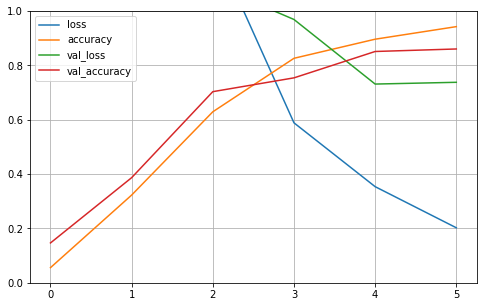

In [27]:
pd.DataFrame(history_full.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [28]:
score = model.evaluate(X_test, Y_test)

34/34 [==============================] - 1s 42ms/step - loss: 0.7112 - accuracy: 0.8530


In [29]:
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(Y_test,axis = 1)
print(classification_report(Y_test_cat, Y_pred_classes, target_names = distinct_char_list))

              precision    recall  f1-score   support

           A       1.00      0.76      0.87        34
           B       0.67      0.67      0.67        43
           C       0.93      0.76      0.84        51
           D       0.96      0.96      0.96        47
           E       0.58      0.75      0.65        40
           F       0.90      1.00      0.95        35
           G       1.00      0.84      0.91        37
           H       0.77      0.94      0.85        32
           I       0.60      0.63      0.62        41
           J       0.98      0.72      0.83        61
           K       0.76      0.92      0.83        52
           L       0.95      0.69      0.80        54
           M       0.76      0.82      0.79        39
           N       0.87      0.70      0.78        37
           O       0.93      0.88      0.90        32
           P       0.97      1.00      0.99        37
           Q       0.95      0.95      0.95        41
           R       0.84    

### Model 3

In [44]:
model3= Sequential()

model3.add(Conv2D(64, (3, 3), input_shape= X_train.shape[1:]))
model3.add(Activation('relu'))

model3.add(Conv2D(64, (3, 3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Flatten())
model3.add(Dense(500))

model3.add(Dense(350))
model3.add(Activation('relu'))

model3.add(Dense(200))
model3.add(Activation('relu'))
model3.add(Dropout(rate=0.5))

model3.add(Dense(26))
model3.add(Activation('sigmoid'))

model3.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

result3 = model3.fit(X_train,Y_train, batch_size=300, epochs=15, validation_steps=1, validation_split = 0.2)

Epoch 1/15
12/12 [==============================] - 53s 4s/step - loss: 3.3697 - accuracy: 0.0650 - val_loss: 3.1578 - val_accuracy: 0.1933
Epoch 2/15
12/12 [==============================] - 55s 5s/step - loss: 3.0511 - accuracy: 0.1618 - val_loss: 2.8201 - val_accuracy: 0.2767
Epoch 3/15
12/12 [==============================] - 56s 5s/step - loss: 2.7125 - accuracy: 0.2520 - val_loss: 2.2400 - val_accuracy: 0.4367
Epoch 4/15
12/12 [==============================] - 57s 5s/step - loss: 2.1663 - accuracy: 0.3951 - val_loss: 1.5786 - val_accuracy: 0.6400
Epoch 5/15
12/12 [==============================] - 56s 5s/step - loss: 1.6064 - accuracy: 0.5540 - val_loss: 1.1547 - val_accuracy: 0.7000
Epoch 6/15
12/12 [==============================] - 56s 5s/step - loss: 1.1213 - accuracy: 0.6806 - val_loss: 0.9011 - val_accuracy: 0.7867
Epoch 7/15
12/12 [==============================] - 57s 5s/step - loss: 0.7416 - accuracy: 0.7945 - val_loss: 0.7093 - val_accuracy: 0.8233
Epoch 8/15
12/12 [==

### The above model is our best model which has a validation accuracy of 0.903 and the training accuracy of 0.9803.

### Evaluating the Model

In [45]:
score3 = model3.evaluate(X_test, Y_test)

34/34 [==============================] - 4s 121ms/step - loss: 0.6576 - accuracy: 0.8974


### Plotting Learning Curve

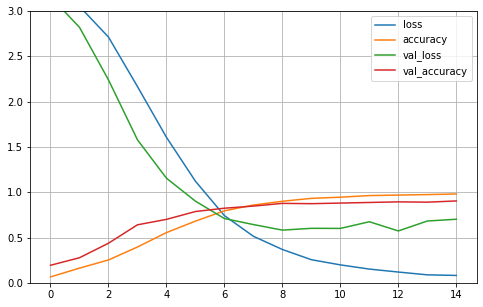

In [46]:
pd.DataFrame(result3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 3) # set the vertical range to [0-1]
plt.show()

In [48]:
Y_test_cat[0:10]

array([ 1,  3,  5,  9, 23,  8, 13, 24, 11, 19])

### Classifcation Report

In [49]:
Y_pred2 = model3.predict(X_test)
Y_pred_classes2 = np.argmax(Y_pred2,axis = 1) 
print(classification_report(Y_test_cat, Y_pred_classes2, target_names = distinct_char_list))

              precision    recall  f1-score   support

           A       0.79      1.00      0.88        34
           B       0.79      0.63      0.70        43
           C       0.88      0.84      0.86        51
           D       1.00      1.00      1.00        47
           E       0.73      0.60      0.66        40
           F       1.00      0.97      0.99        35
           G       0.83      0.95      0.89        37
           H       0.93      0.88      0.90        32
           I       0.81      0.61      0.69        41
           J       0.86      0.92      0.89        61
           K       0.80      0.90      0.85        52
           L       0.96      0.83      0.89        54
           M       0.97      0.79      0.87        39
           N       0.73      0.86      0.79        37
           O       0.88      0.91      0.89        32
           P       0.97      1.00      0.99        37
           Q       0.93      1.00      0.96        41
           R       0.84    

https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-ii-hyper-parameter-42efca01e5d7

### Testing the model

### "Hello" Test

In [59]:
helloTestDir = cwd + '\\Hello' 

In [60]:
for pic in os.listdir(helloTestDir):
    print(pic)

1.jpg
2.jpg
3.jpg
4.jpg
o.jpg


### Adding the images to the image_arrays2, reshaping and normalizing the Hello test data

In [61]:
image_arrays2 = []

for pic in os.listdir(helloTestDir):         
        
    img2 = cv2.imread(os.path.join(helloTestDir, pic), 0)  

    new_img_array = cv2.resize(img2, dsize=(80, 80))
    image_arrays2.append(new_img_array)

X_hello = np.asarray(image_arrays2)

#normalizing x values from 1-255 to 0-1 scale
X_hello_norm = X_hello / 255.0
X_hello_norm_reshaped = X_hello_norm.reshape(X_hello_norm.shape[0], 80, 80, 1)
X_hello_norm_reshaped.shape

(5, 80, 80, 1)

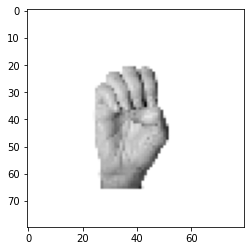

In [62]:
some_pic = image_arrays2[1]
some_pic_image = some_pic.reshape(80,80)
plt.imshow(some_pic_image, cmap='gray')
plt.show()

In [63]:
# hello_pred[1]

### Predicting the Hello test data on the best model

In [64]:
hello_pred = model3.predict(X_hello_norm_reshaped)
hello_pred_classes = np.argmax(hello_pred,axis = 1) 
hello_pred_classes

array([ 7,  4, 11, 11, 14], dtype=int64)

### Printing the character to numerical dictionary

In [65]:
char_num_dict

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

In [66]:
word_list = []
for x in hello_pred_classes:
    for letter, num in char_num_dict.items():
    
        if x == num:
            word_list.append(letter)

### The model correctly predicting the Hello test data

In [67]:
word_list

['H', 'E', 'L', 'L', 'O']

In [68]:
print(''.join(map(str, word_list)))

HELLO
